In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('nypd_arrest.csv')

In [3]:
data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,206892169,12/31/2019,907.0,"IMPAIRED DRIVING,DRUG",347.0,INTOXICATED & IMPAIRED DRIVING,VTL11920U4,M,M,33,0,25-44,M,WHITE,1000916,245710,40.841085,-73.939769
1,206888084,12/31/2019,739.0,"FRAUD,UNCLASSIFIED-FELONY",112.0,THEFT-FRAUD,PL 1908301,F,Q,101,0,25-44,M,BLACK HISPANIC,1055868,156522,40.596012,-73.742116
2,206890433,12/31/2019,122.0,"HOMICIDE, NEGLIGENT, VEHICLE,",102.0,HOMICIDE-NEGLIGENT-VEHICLE,PL 1251201,F,M,23,0,18-24,M,BLACK,997462,227024,40.789803,-73.952289
3,206890441,12/31/2019,268.0,CRIMINAL MIS 2 & 3,121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450502,F,S,120,0,18-24,M,BLACK,962822,174282,40.645023,-74.077217
4,206890973,12/31/2019,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,25,97,25-44,M,BLACK,1004138,226326,40.787875,-73.928182


In [4]:
data.drop(['ARREST_KEY', 'PD_CD', 'KY_CD', 'LAW_CODE', ], axis=1, inplace=True)

In [5]:
data.dropna(inplace=True)

In [59]:
#data.info()

In [7]:
data.rename(columns={'PD_DESC':'offenses', 'LAW_CAT_CD':'offense_type'}, inplace=True)

In [7]:
#data.PERP_RACE.value_counts(normalize=True).mul(100).round(2).astype(str) + ' %'
#data.ARREST_BORO.value_counts()
#data.PD_DESC.value_counts()[:10]
#data.ARREST_PRECINCT.value_counts()[:20]

In [72]:
data.offenses.value_counts()[:20]

ASSAULT 3                                    24513
LARCENY,PETIT FROM OPEN AREAS,               21568
TRAFFIC,UNCLASSIFIED MISDEMEAN               13624
ASSAULT 2,1,UNCLASSIFIED                     11498
ROBBERY,OPEN AREA UNCLASSIFIED                9235
CONTROLLED SUBSTANCE, POSSESSI                9235
LARCENY,GRAND FROM OPEN AREAS, UNATTENDED     8628
PUBLIC ADMINISTRATION,UNCLASSI                7795
INTOXICATED DRIVING,ALCOHOL                   5120
FORGERY,ETC.,UNCLASSIFIED-FELO                4708
MENACING,UNCLASSIFIED                         4258
THEFT OF SERVICES, UNCLASSIFIE                4194
CRIMINAL MISCHIEF,UNCLASSIFIED 4              4073
CONTROLLED SUBSTANCE,INTENT TO                3949
BURGLARY,UNCLASSIFIED,UNKNOWN                 3892
AGGRAVATED HARASSMENT 2                       3463
CRIMINAL MIS 2 & 3                            3283
WEAPONS POSSESSION 1 & 2                      3217
OBSTR BREATH/CIRCUL                           3217
CONTEMPT,CRIMINAL              

In [12]:
data['date'] = pd.to_datetime(data.ARREST_DATE, format= '%m/%d/%Y', errors='raise')

In [14]:
dat = data.set_index('date')

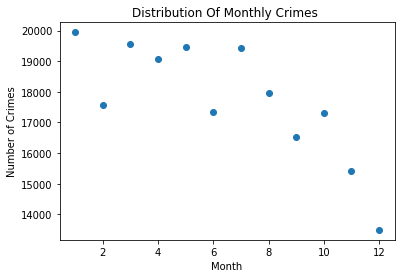

In [126]:
# Distribution Of Monthly Crimes 

plt.scatter(dat.index.month.value_counts().index, dat.index.month.value_counts().values)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Distribution Of Monthly Crimes ')
plt.show()

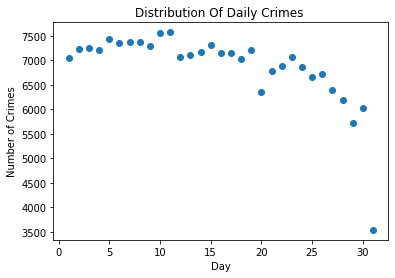

In [127]:
#Distribution Of Daily Crimes 

plt.scatter(dat.index.day.value_counts().index, dat.index.day.value_counts().values)
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.title('Distribution Of Daily Crimes ')
plt.show()

In [40]:
len(dat.index.unique())
len(dat.index.value_counts())
dat.index.month.value_counts()

365

In [122]:
#Top Crimes Per Month
dat.offenses.groupby(dat.index.month).sum()

date
1     CONTROLLED SUBSTANCE,INTENT TOBURGLARY,UNCLASS...
2     ASSAULT 2,1,UNCLASSIFIEDPUBLIC ADMINISTATION,U...
3     FORGERY,ETC.,UNCLASSIFIED-FELOCONTROLLED SUBST...
4     ROBBERY,OPEN AREA UNCLASSIFIEDCRIMINAL MIS 2 &...
5     CRIMINAL CONTEMPT 1ASSAULT 3CRIMINAL CONTEMPT ...
6     CONTROLLED SUBSTANCE, POSSESSIROBBERY,OPEN ARE...
7     ROBBERY,OPEN AREA UNCLASSIFIEDTRAFFIC,UNCLASSI...
8     ASSAULT 2,1,UNCLASSIFIEDCONTROLLED SUBSTANCE, ...
9     CRIMINAL MISCHIEF,UNCLASSIFIED 4NY STATE LAWS,...
10    ASSAULT 3TRESPASS 3, CRIMINALNY STATE LAWS,UNC...
11    LARCENY,PETIT FROM OPEN AREAS,INTOXICATED DRIV...
12    IMPAIRED DRIVING,DRUGFRAUD,UNCLASSIFIED-FELONY...
Name: offenses, dtype: object